In [181]:
#Load the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [182]:
#Importing the dataset from my pc
df = pd.read_csv("diabetes.csv")

In [183]:
#Small overview of the first 5 observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [184]:
#The dimension of the dataframe
df.shape

(768, 9)

In [185]:
#Missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [186]:
#Information about the data
df.info()#all features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [187]:
#Some important statistical parameters
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


Shape of your Data Set loaded: (690, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
DiabetesPedigreeFunction,450,float64,0,0.000000,65.217391,0,
BMI,237,float64,0,0.000000,34.347826,0,
Insulin,175,int64,0,0.000000,25.362319,0,
Glucose,134,int64,0,0.000000,19.420290,0,
Age,52,int64,0,0.000000,7.536232,0,
SkinThickness,50,int64,0,0.000000,7.246377,0,
BloodPressure,46,int64,0,0.000000,6.666667,0,
Pregnancies,17,int64,0,0.000000,2.463768,0,


  Printing upto 30 columns max in each category:
    Numeric Columns : ['BMI', 'DiabetesPedigreeFunction']
    Integer-Categorical Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
   Columns to delete:
'   []'
   Boolean variables %s 
'   []'
   Categorical variables %s 
("   ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', "
 "'Age']")
   Continuous variables %s 
"   ['BMI', 'DiabetesPedigreeFunction']"
   Discrete string variables %s 
'   []'
   Date a

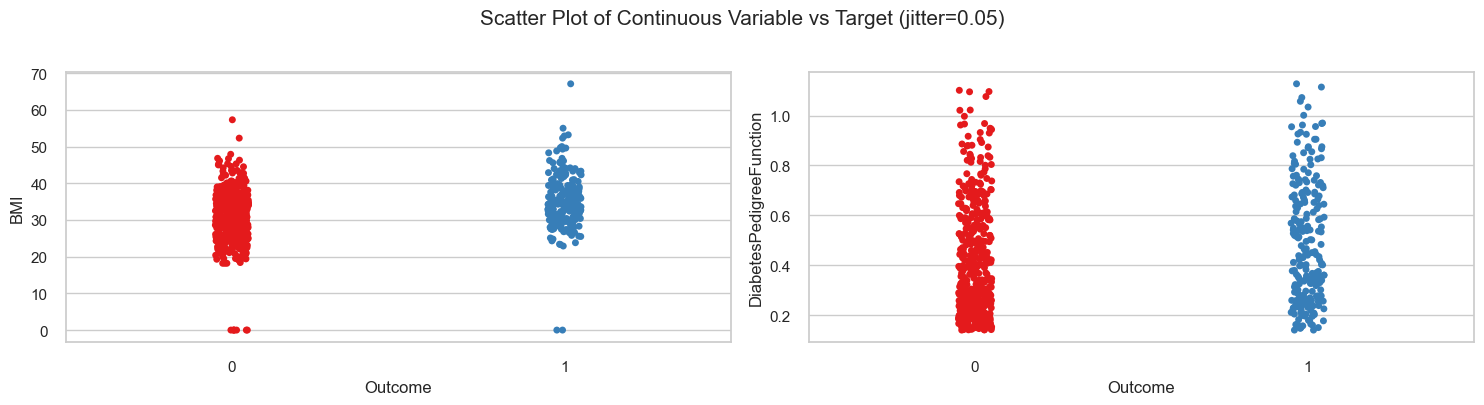

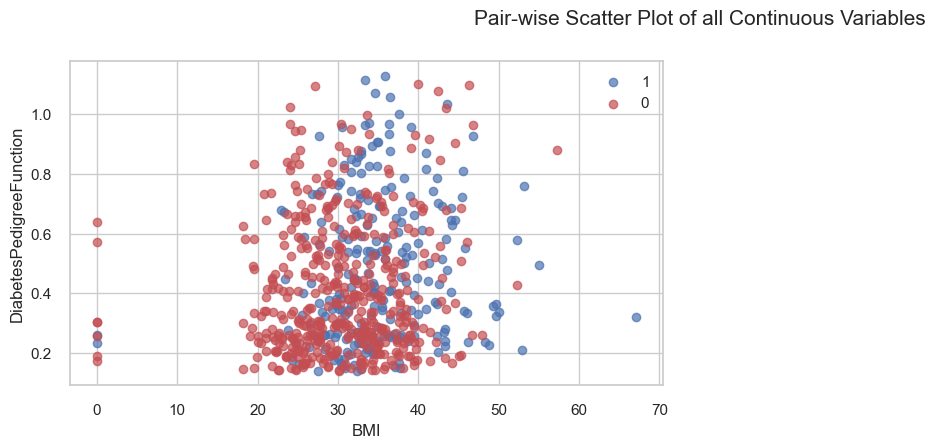

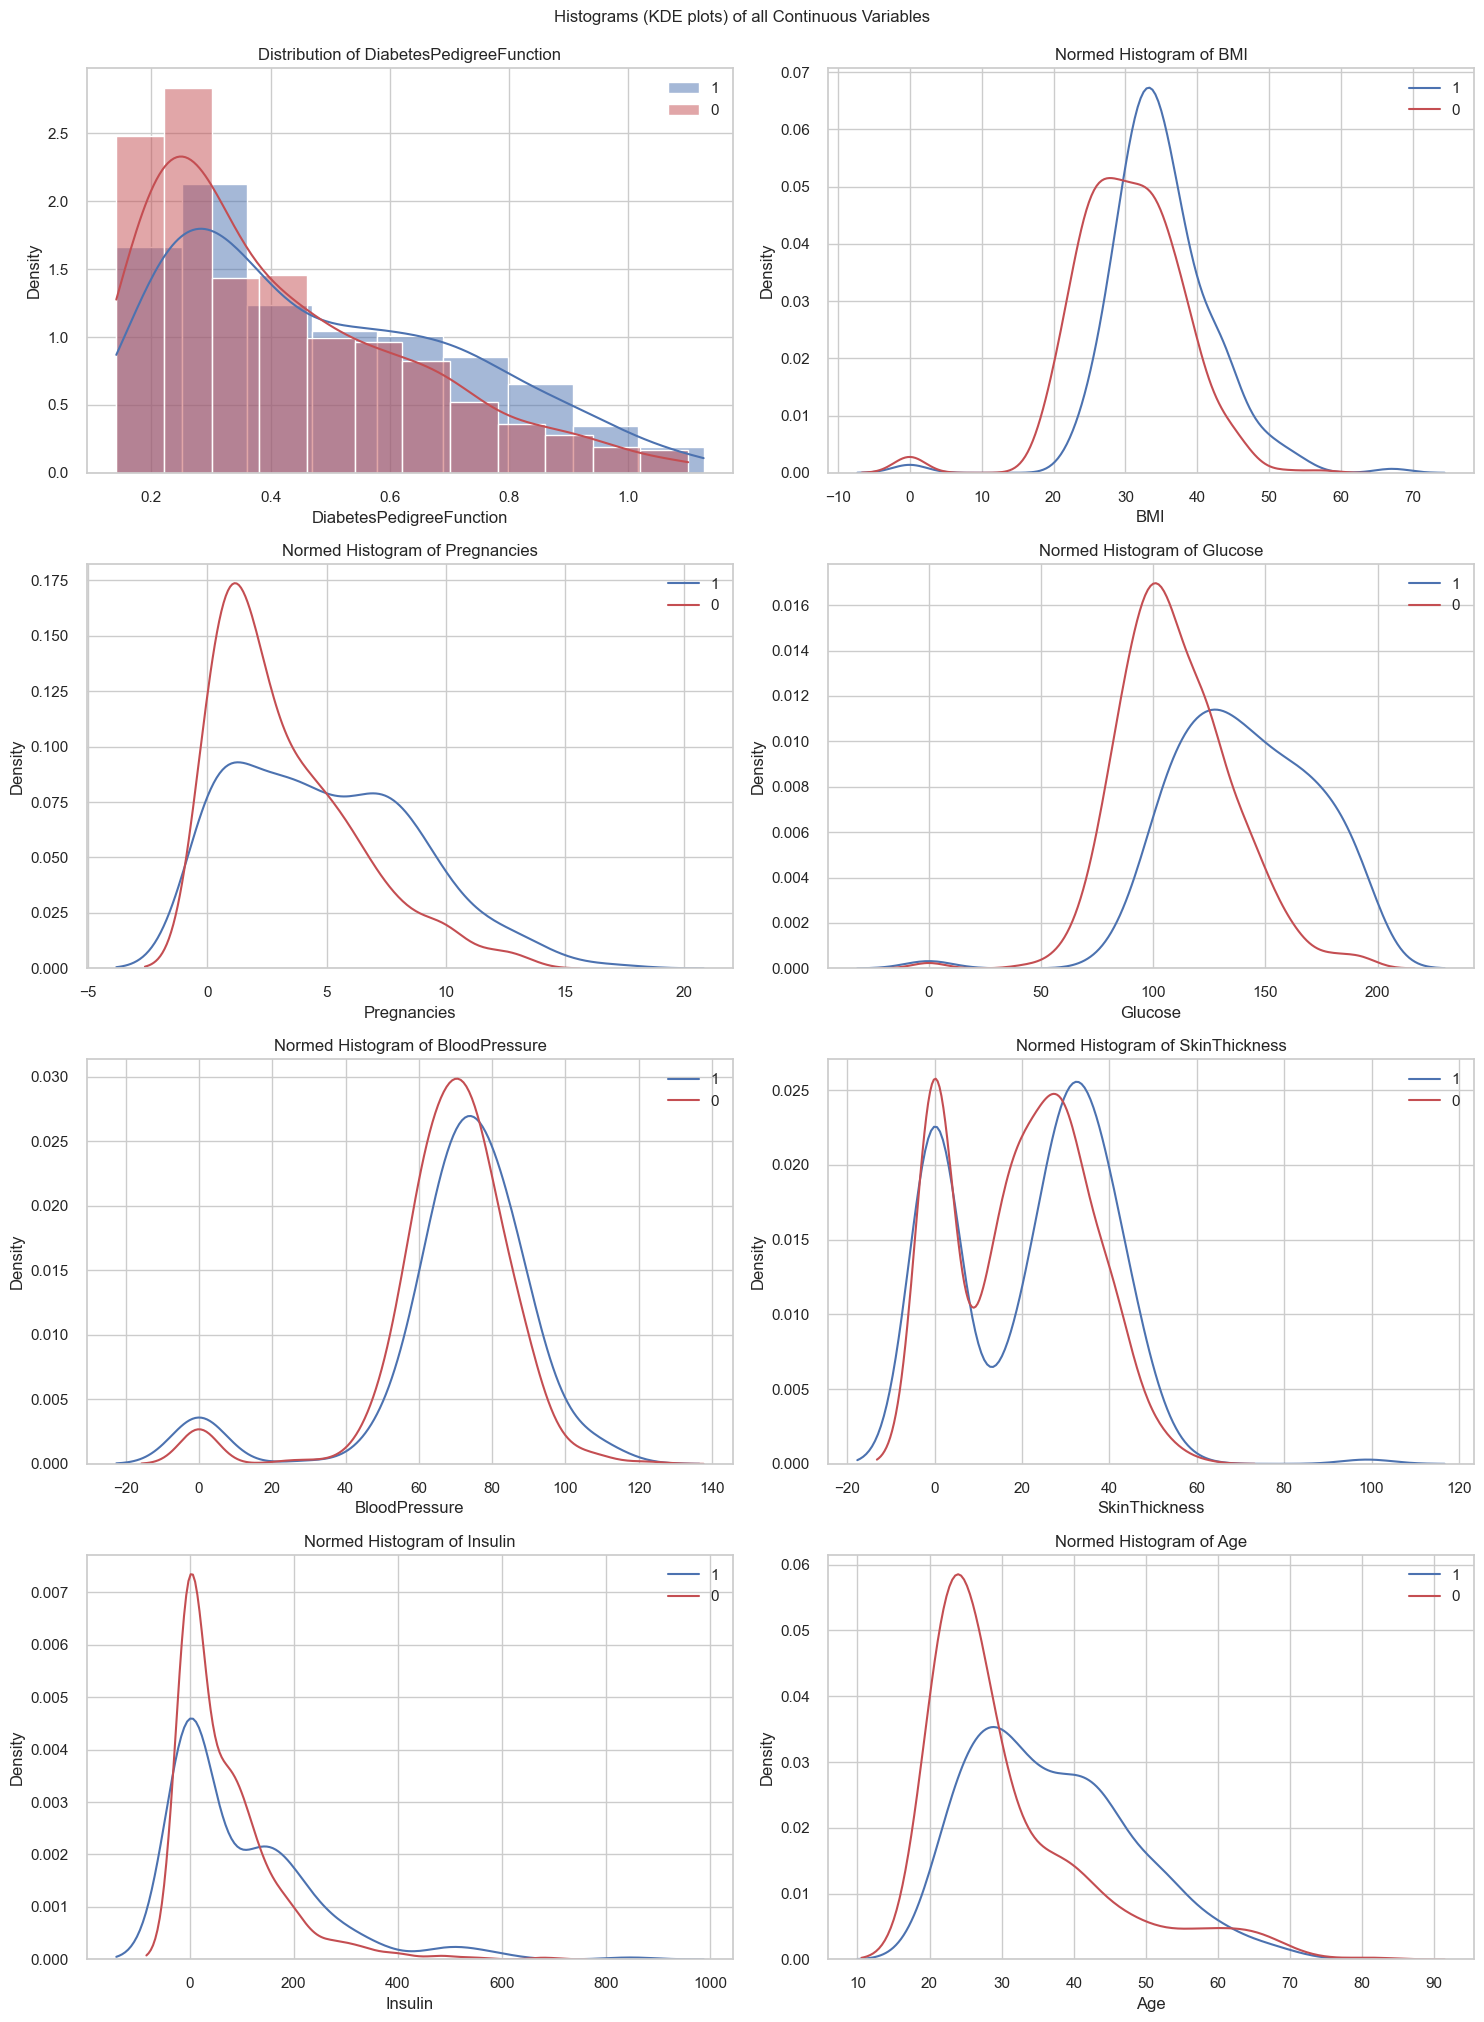

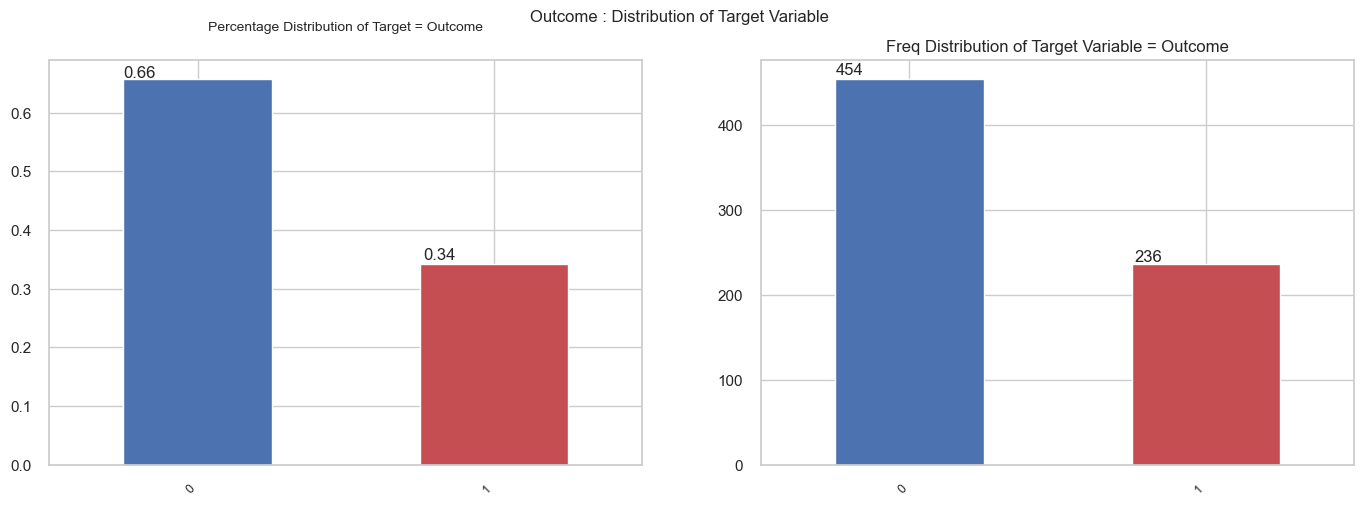

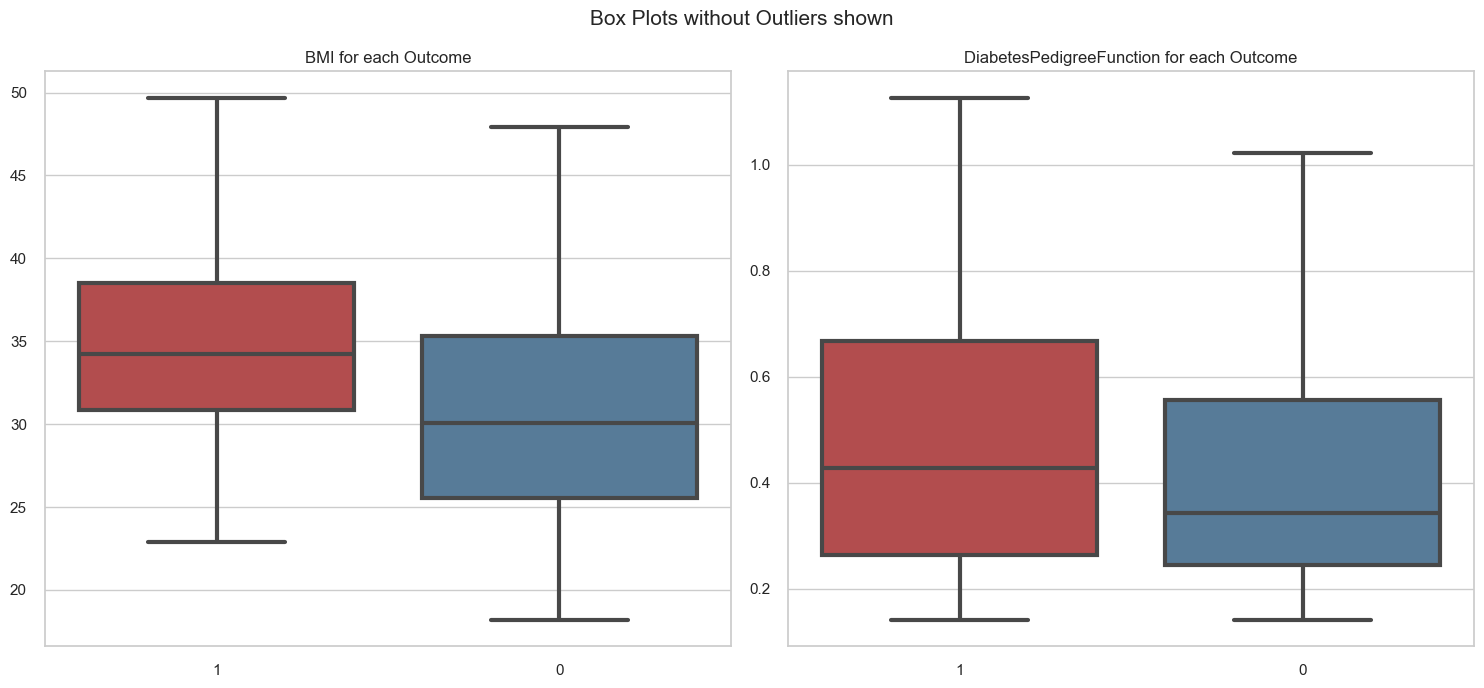

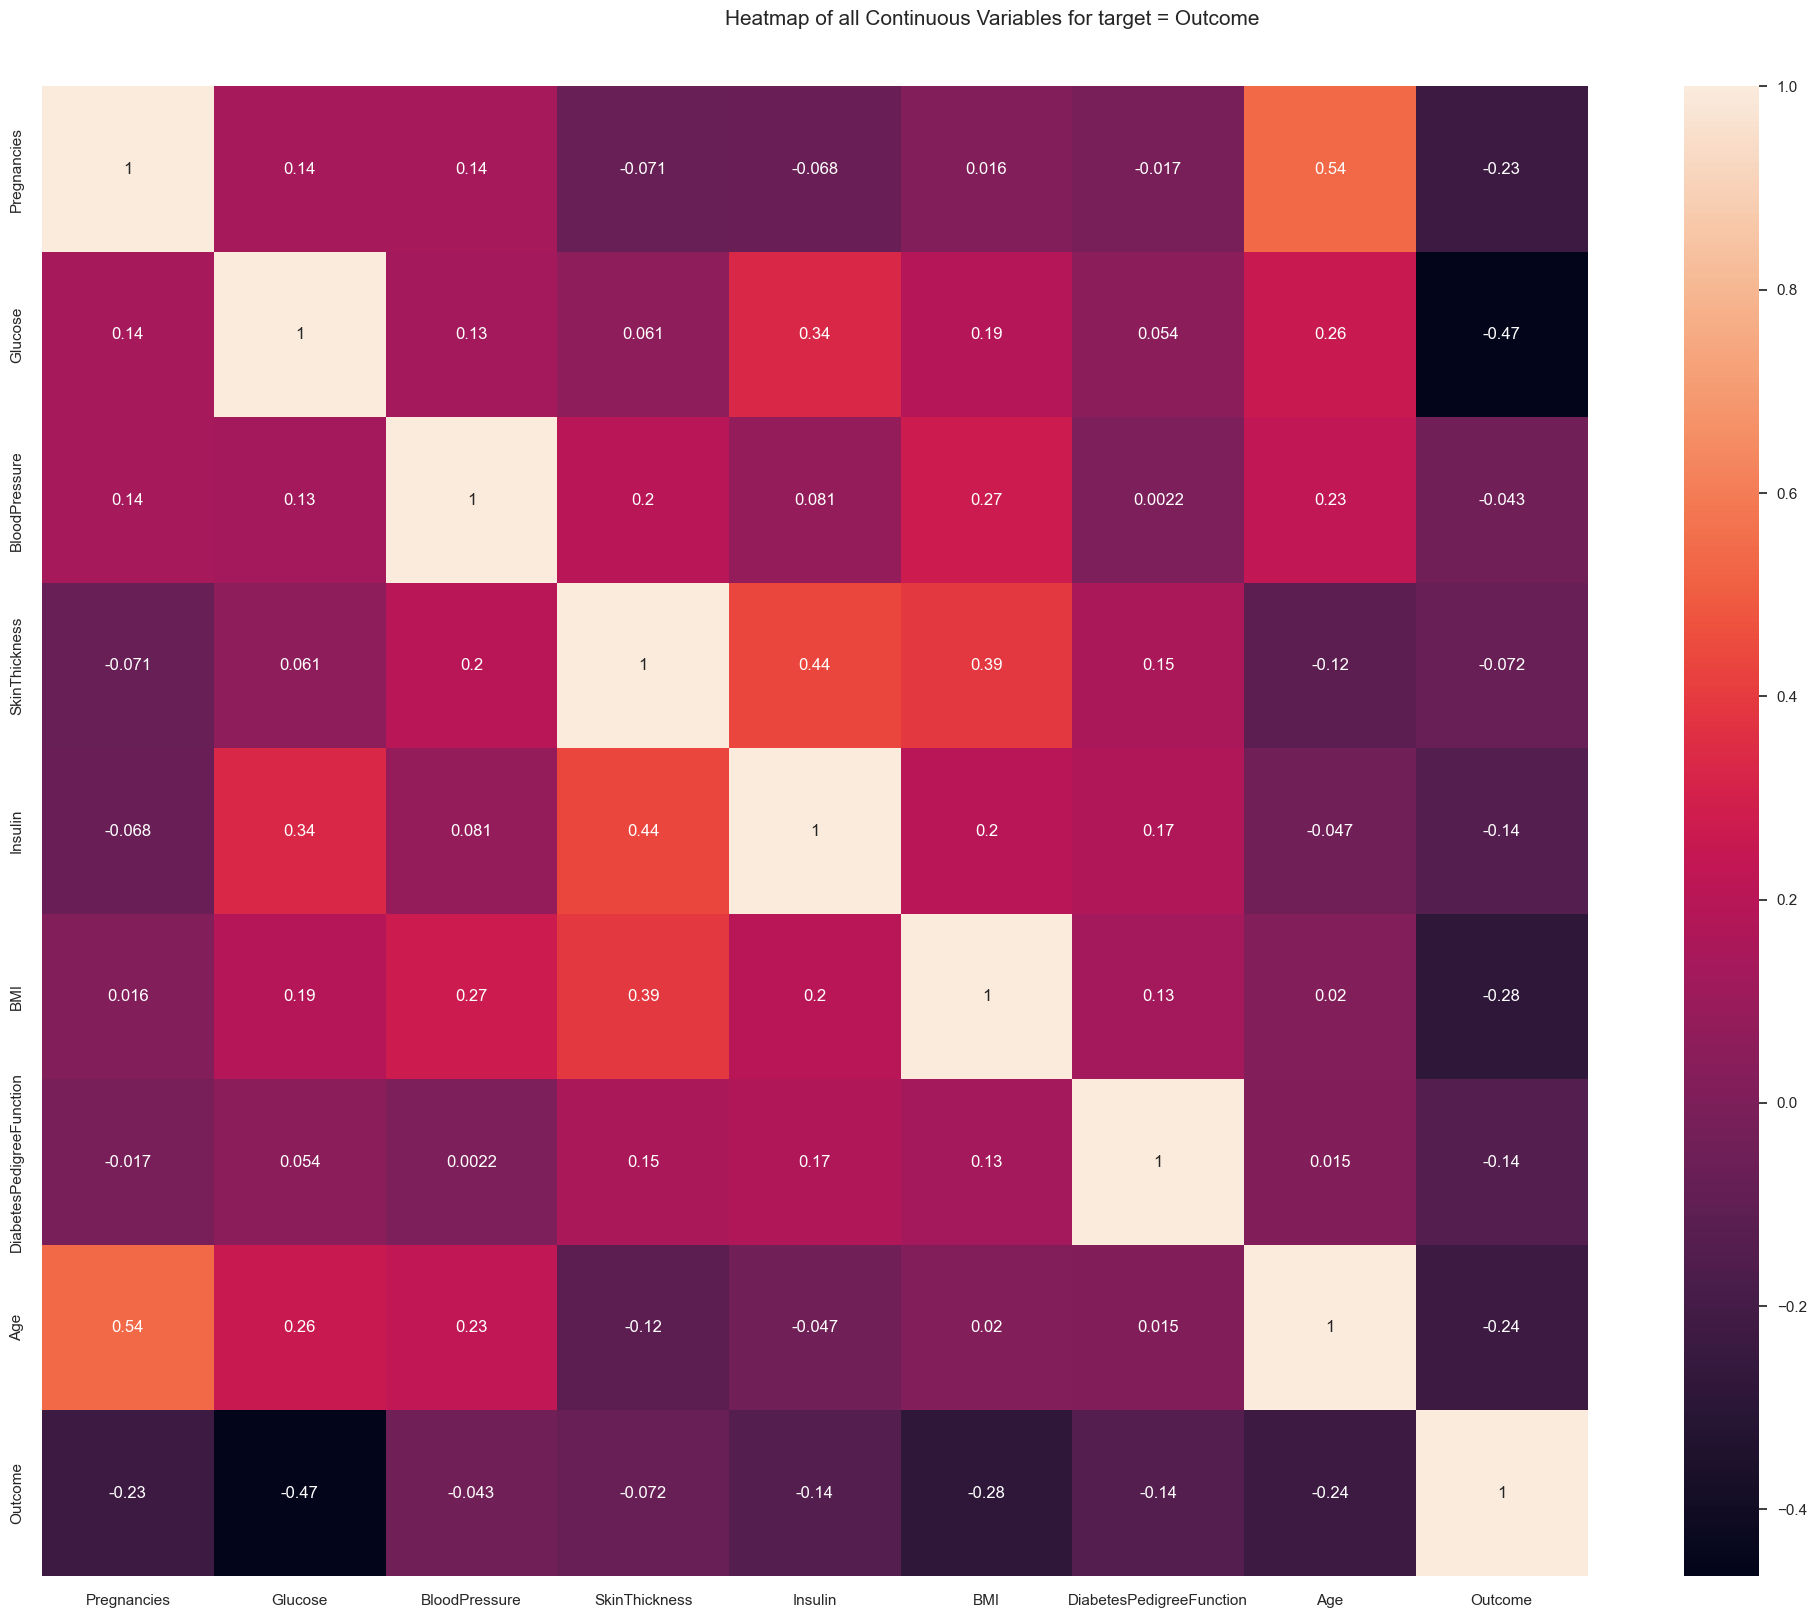

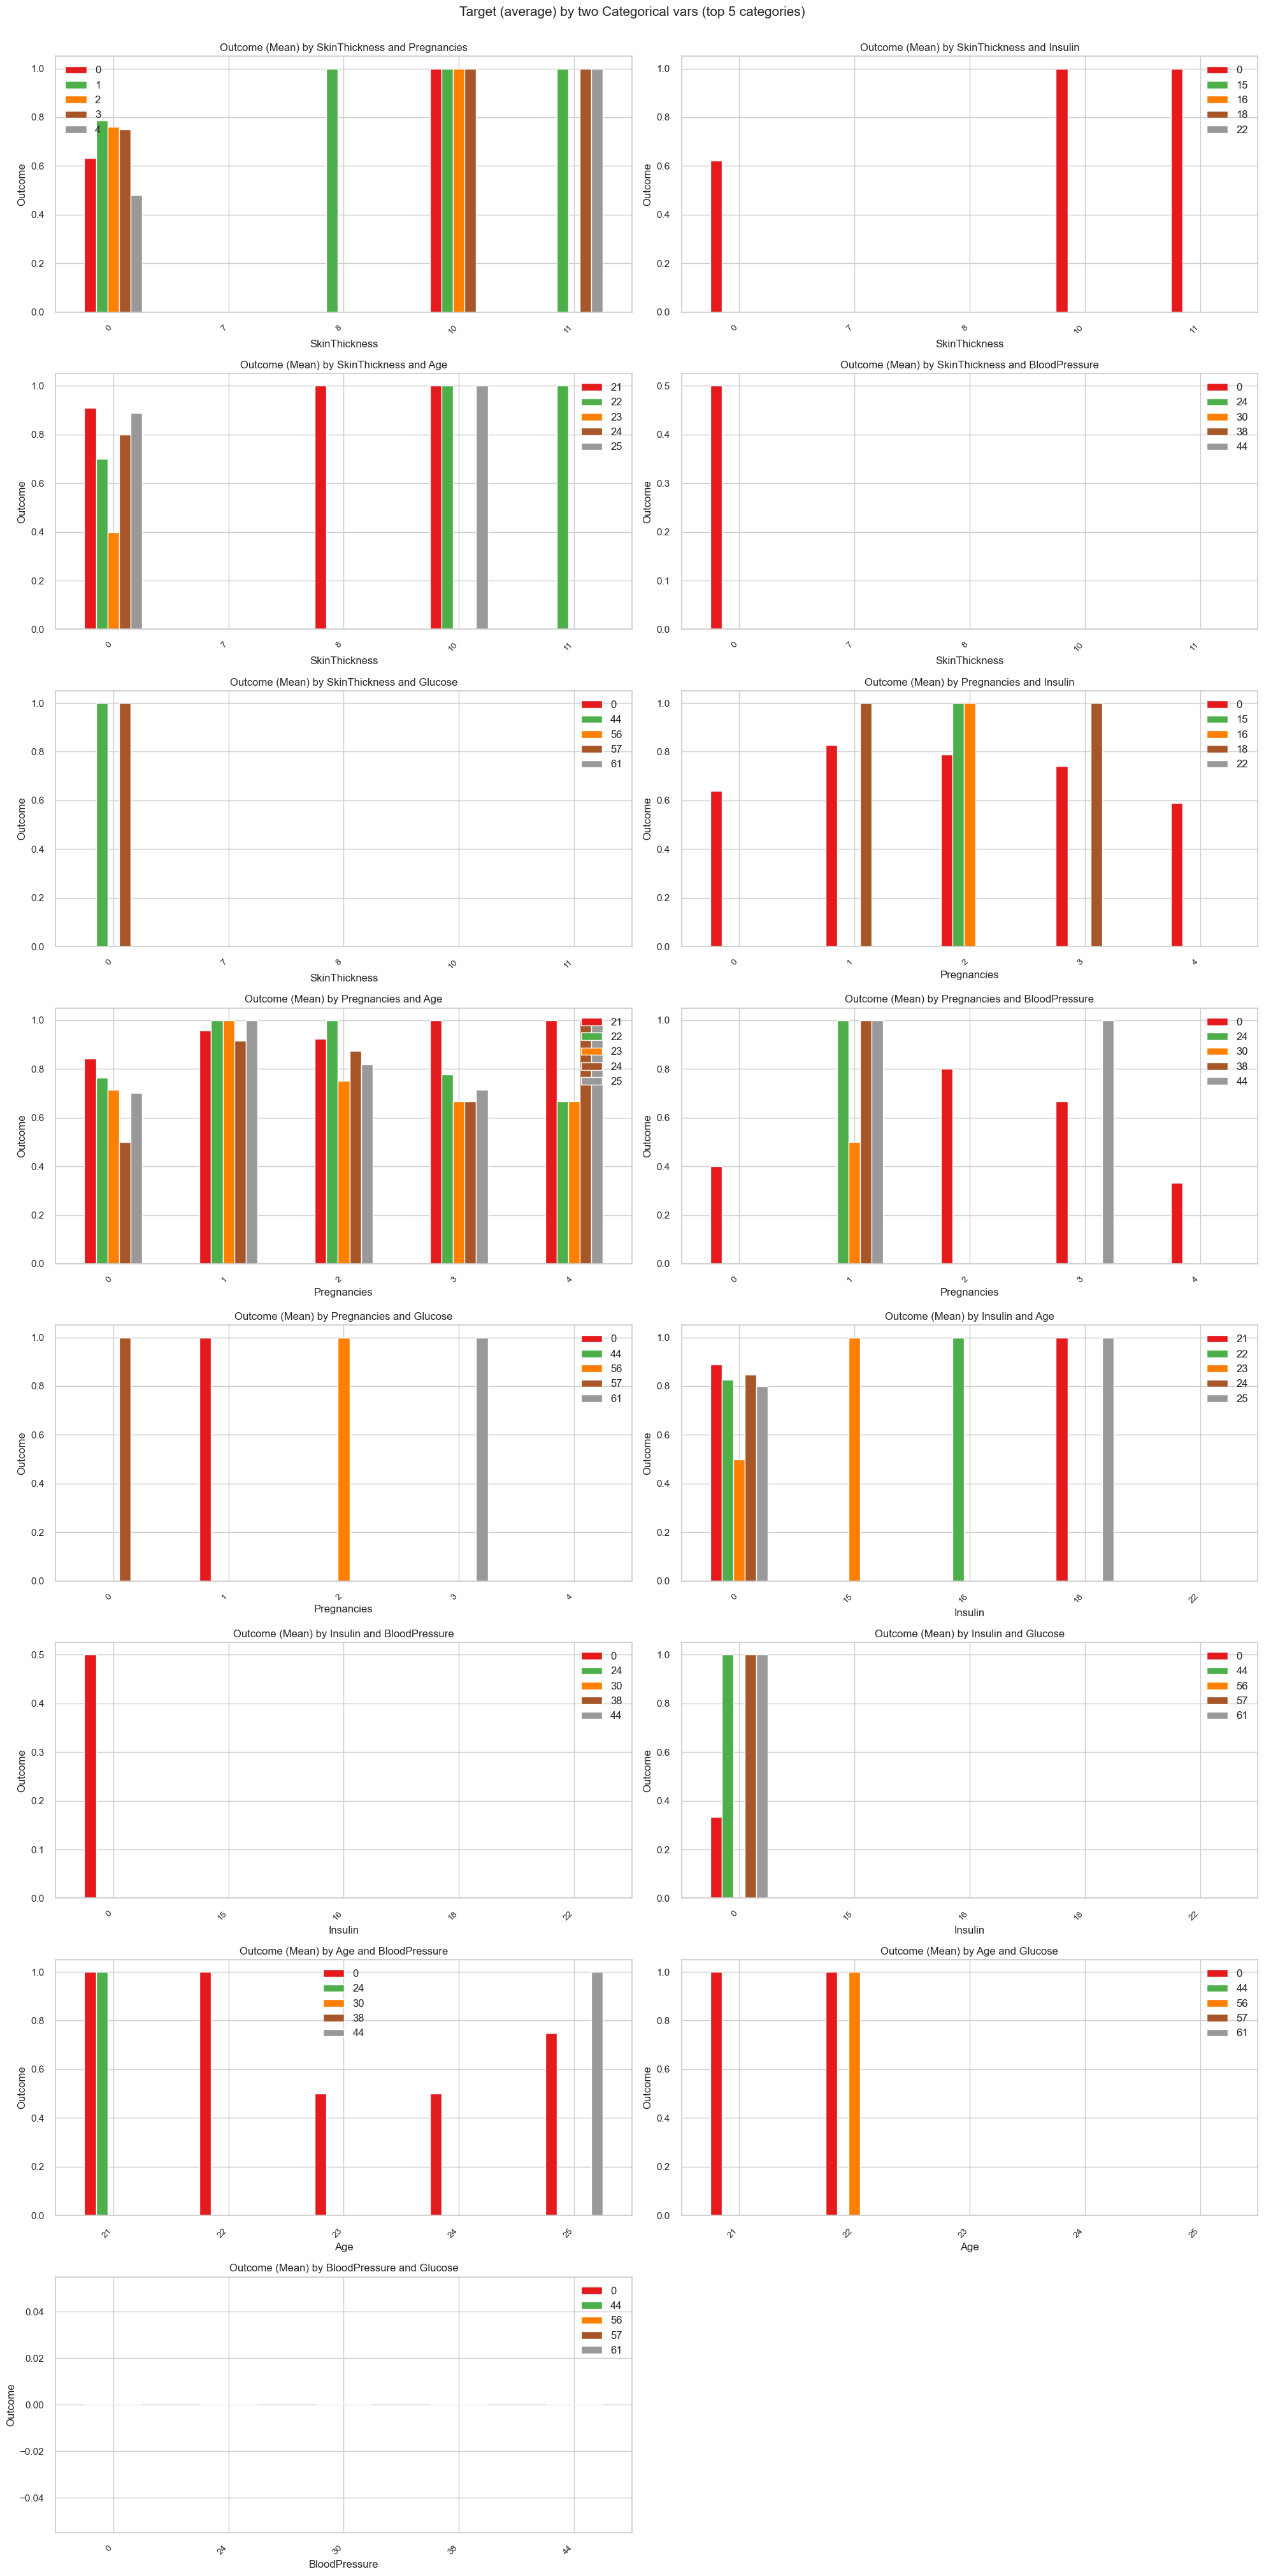

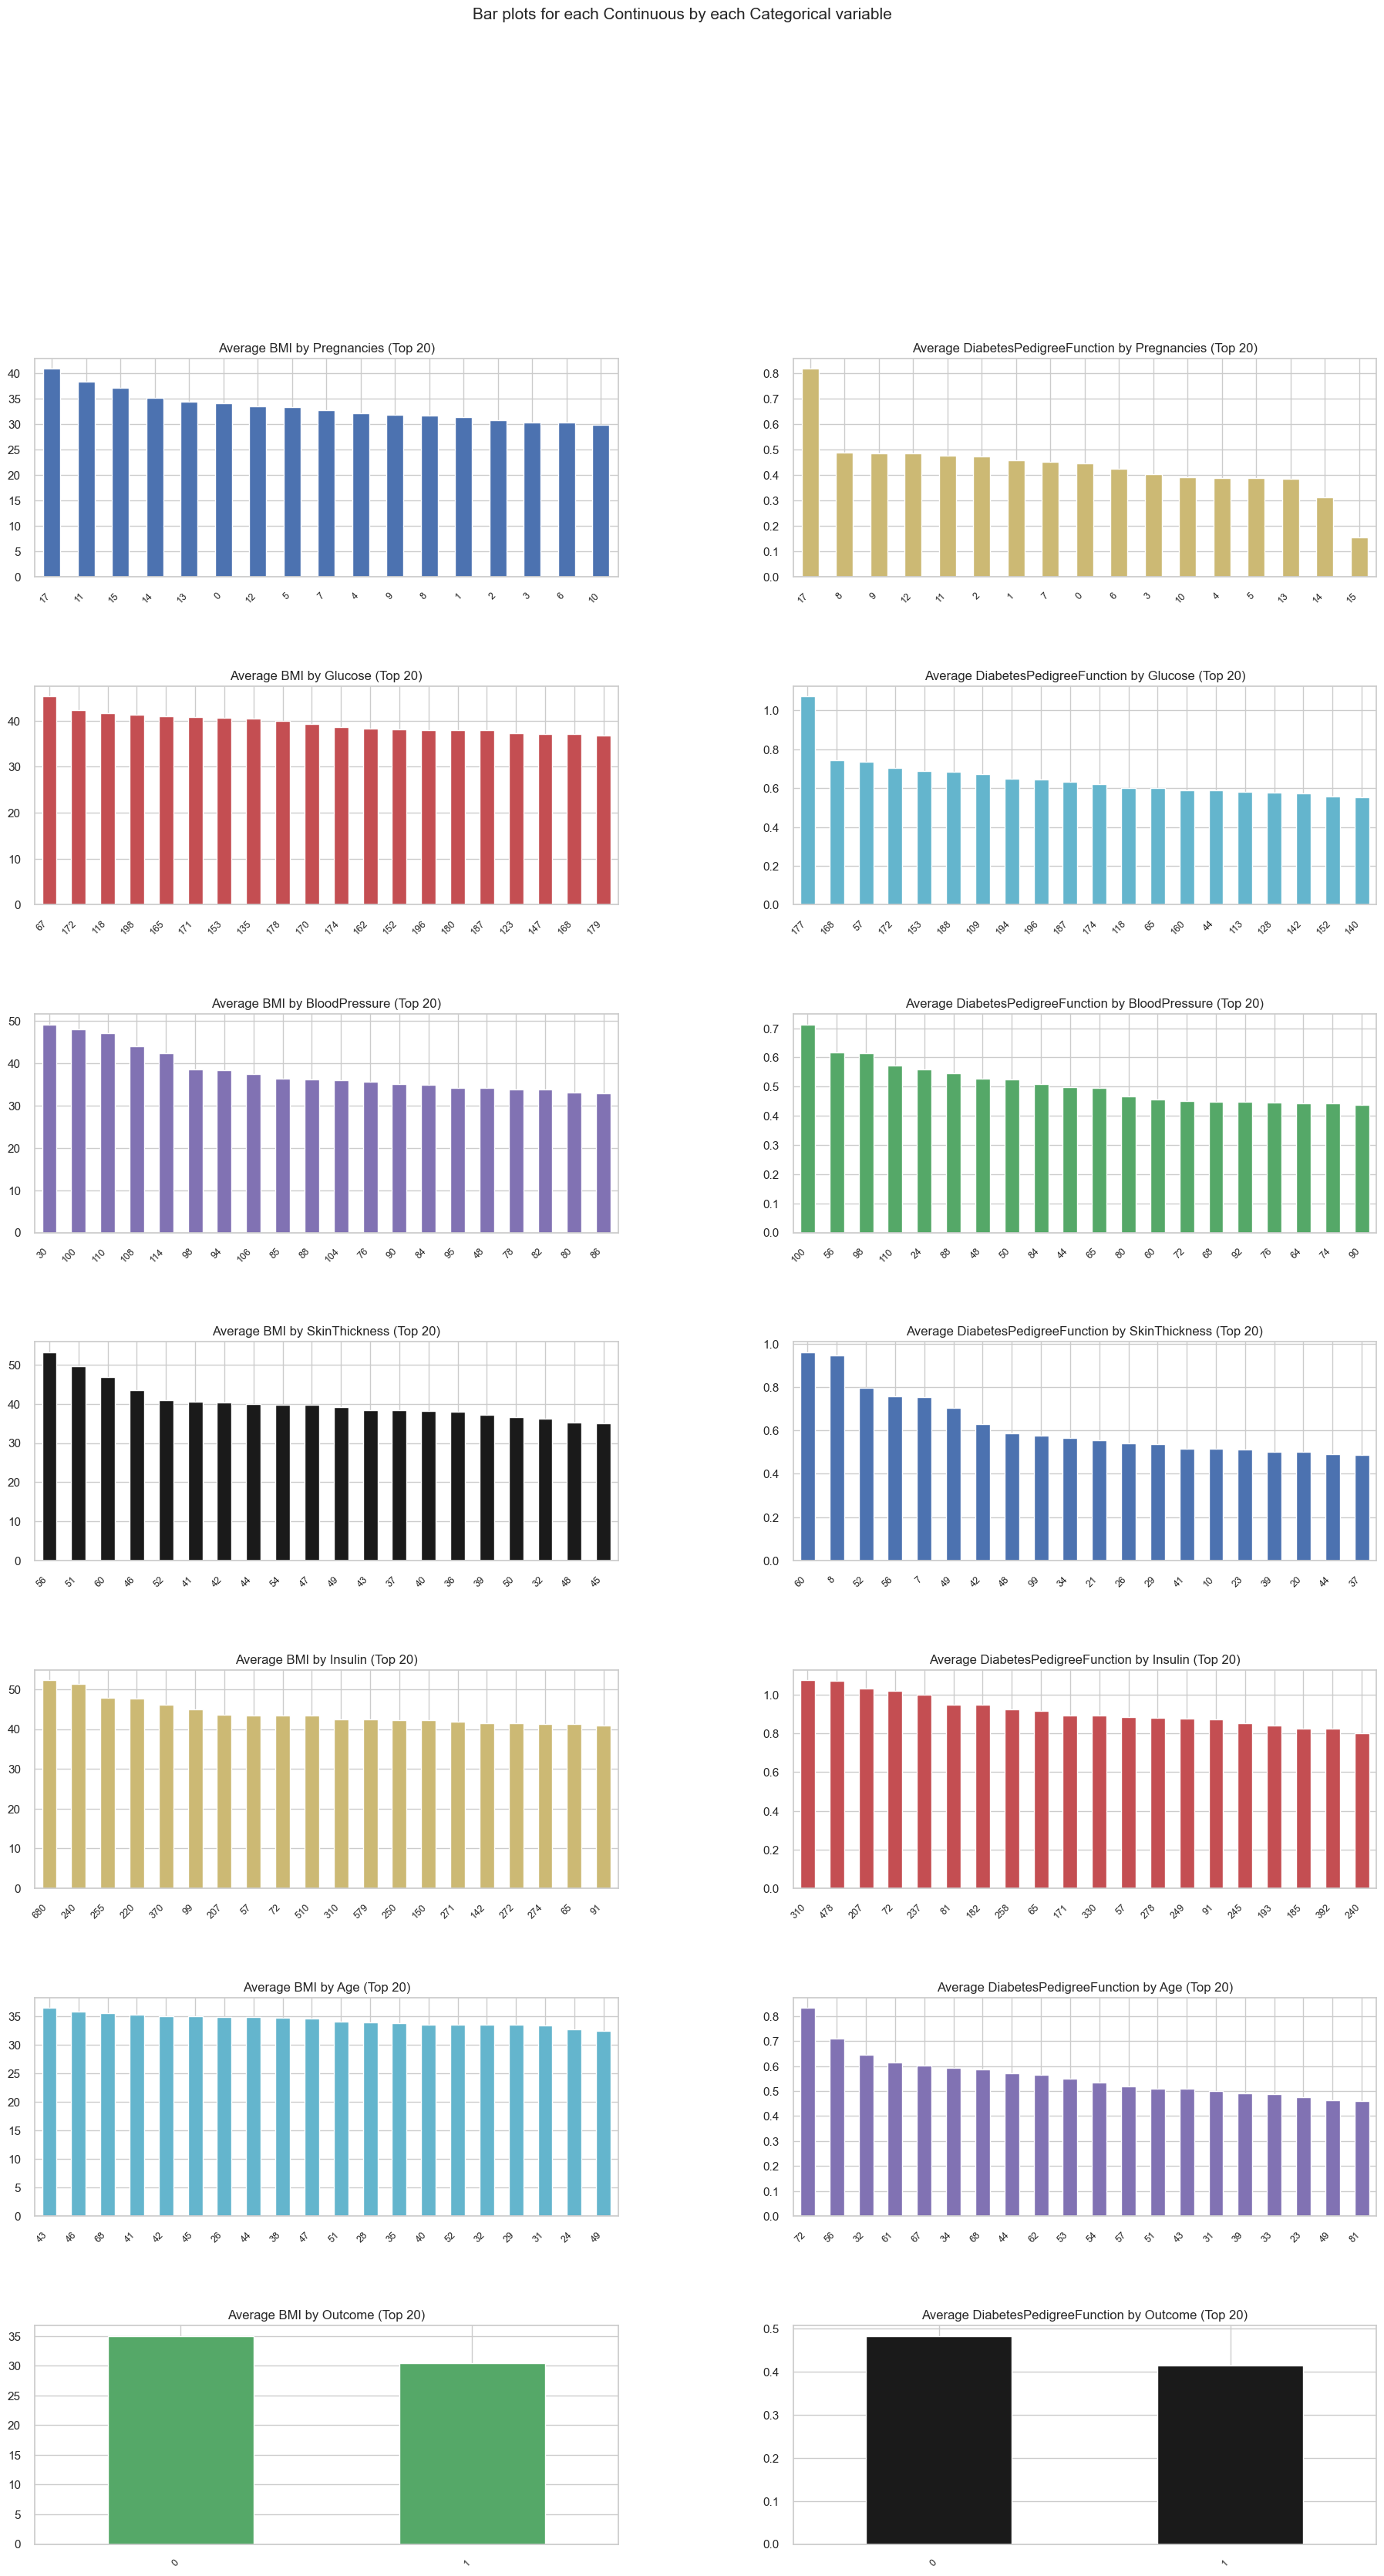

In [222]:
#Automatic Visualizations by the Autoviz package
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()
dftc = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='Outcome', 
    dfte=df, 
    header=0, 
    verbose=2, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=900, 
    max_cols_analyzed=10
)

In [189]:
#AutoViz no displays plots automatically. 
#You must perform %matplotlib inline just before 
#you run AutoViz on your data.
%matplotlib inline 

Shape of your Data Set loaded: (768, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
DiabetesPedigreeFunction,517,float64,0,0.000000,67.317708,0,skewed: cap or drop outliers
BMI,248,float64,0,0.000000,32.291667,0,
Insulin,186,int64,0,0.000000,24.218750,0,
Glucose,136,int64,0,0.000000,17.708333,0,
Age,52,int64,0,0.000000,6.770833,0,
SkinThickness,51,int64,0,0.000000,6.640625,0,
BloodPressure,47,int64,0,0.000000,6.119792,0,
Pregnancies,17,int64,0,0.000000,2.213542,0,
Outcome,2,int64,0,0.000000,0.260417,0,


    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


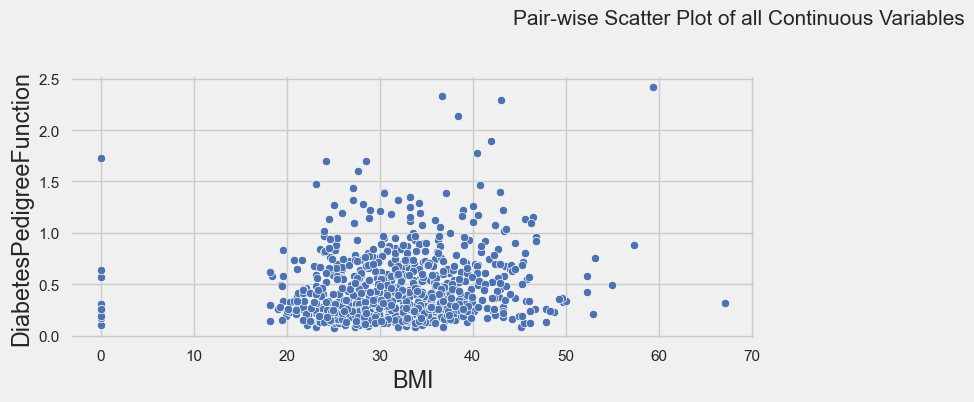

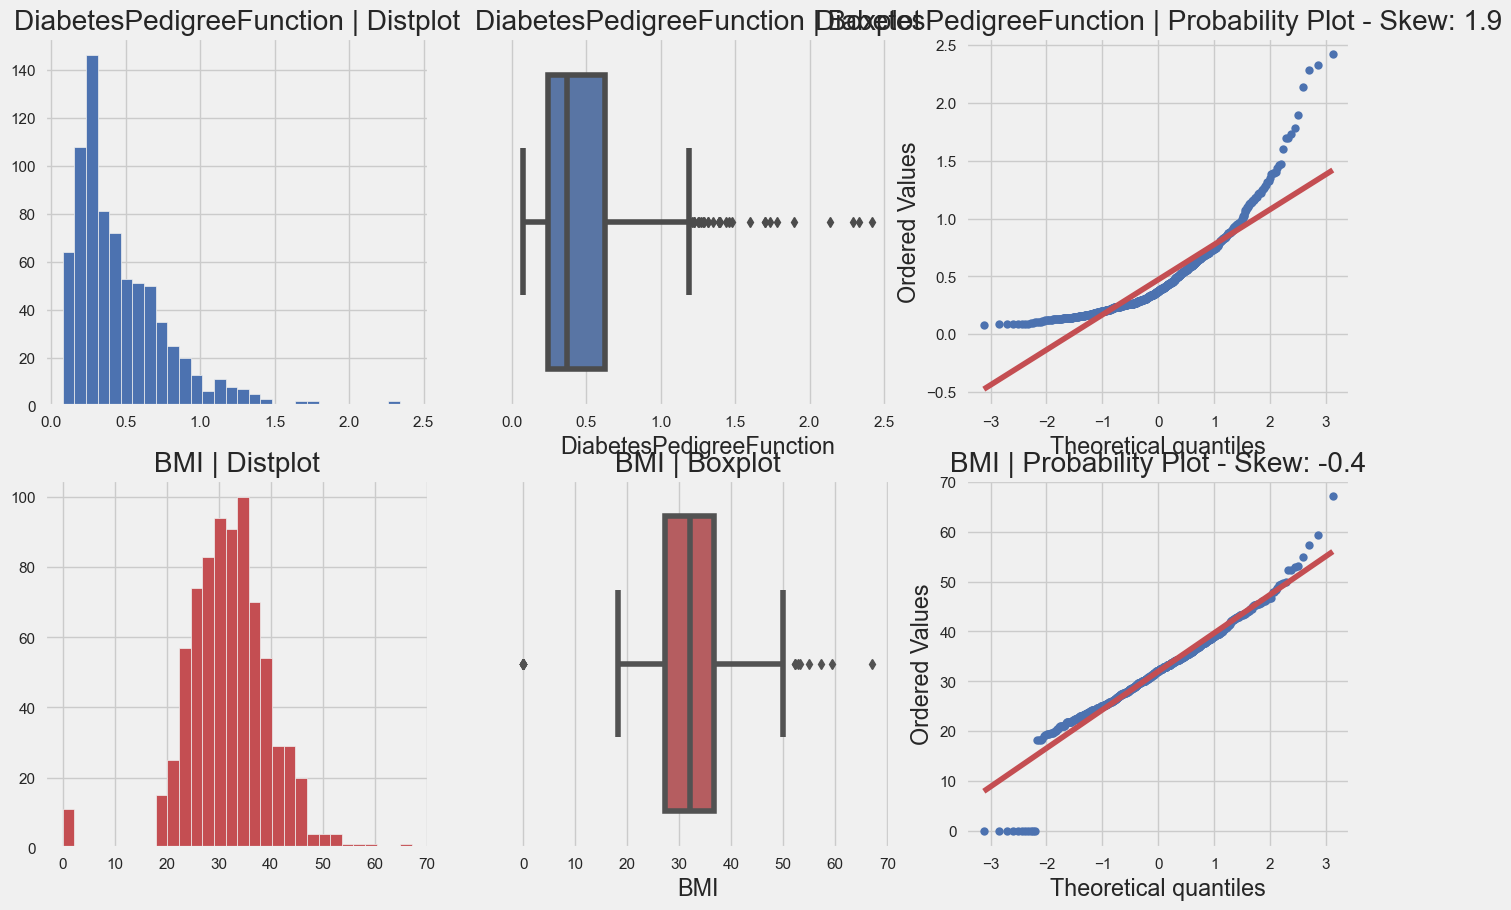

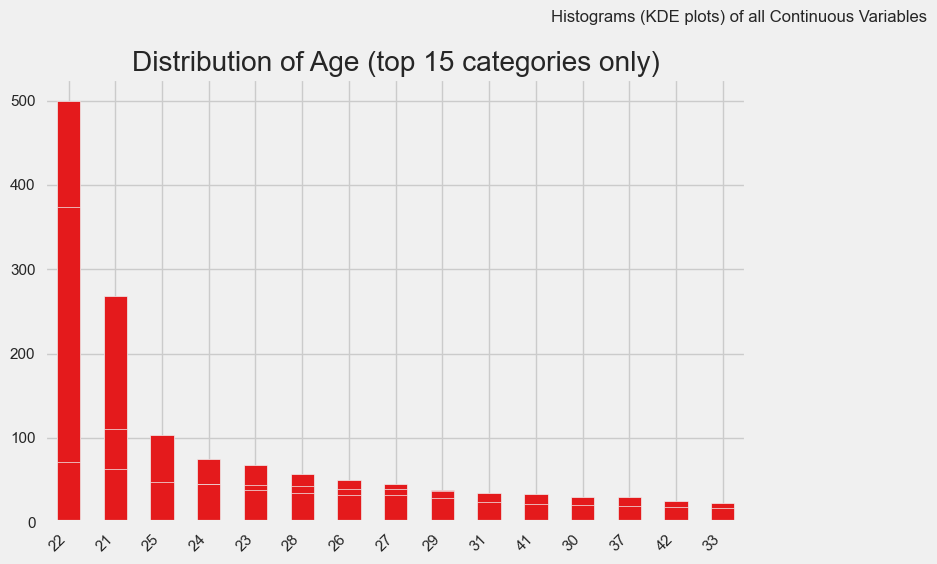

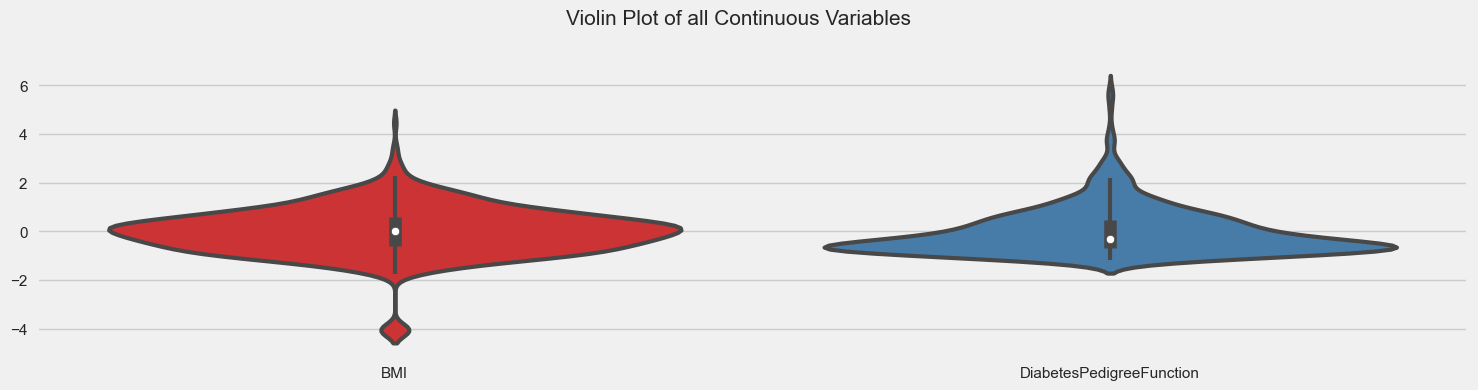

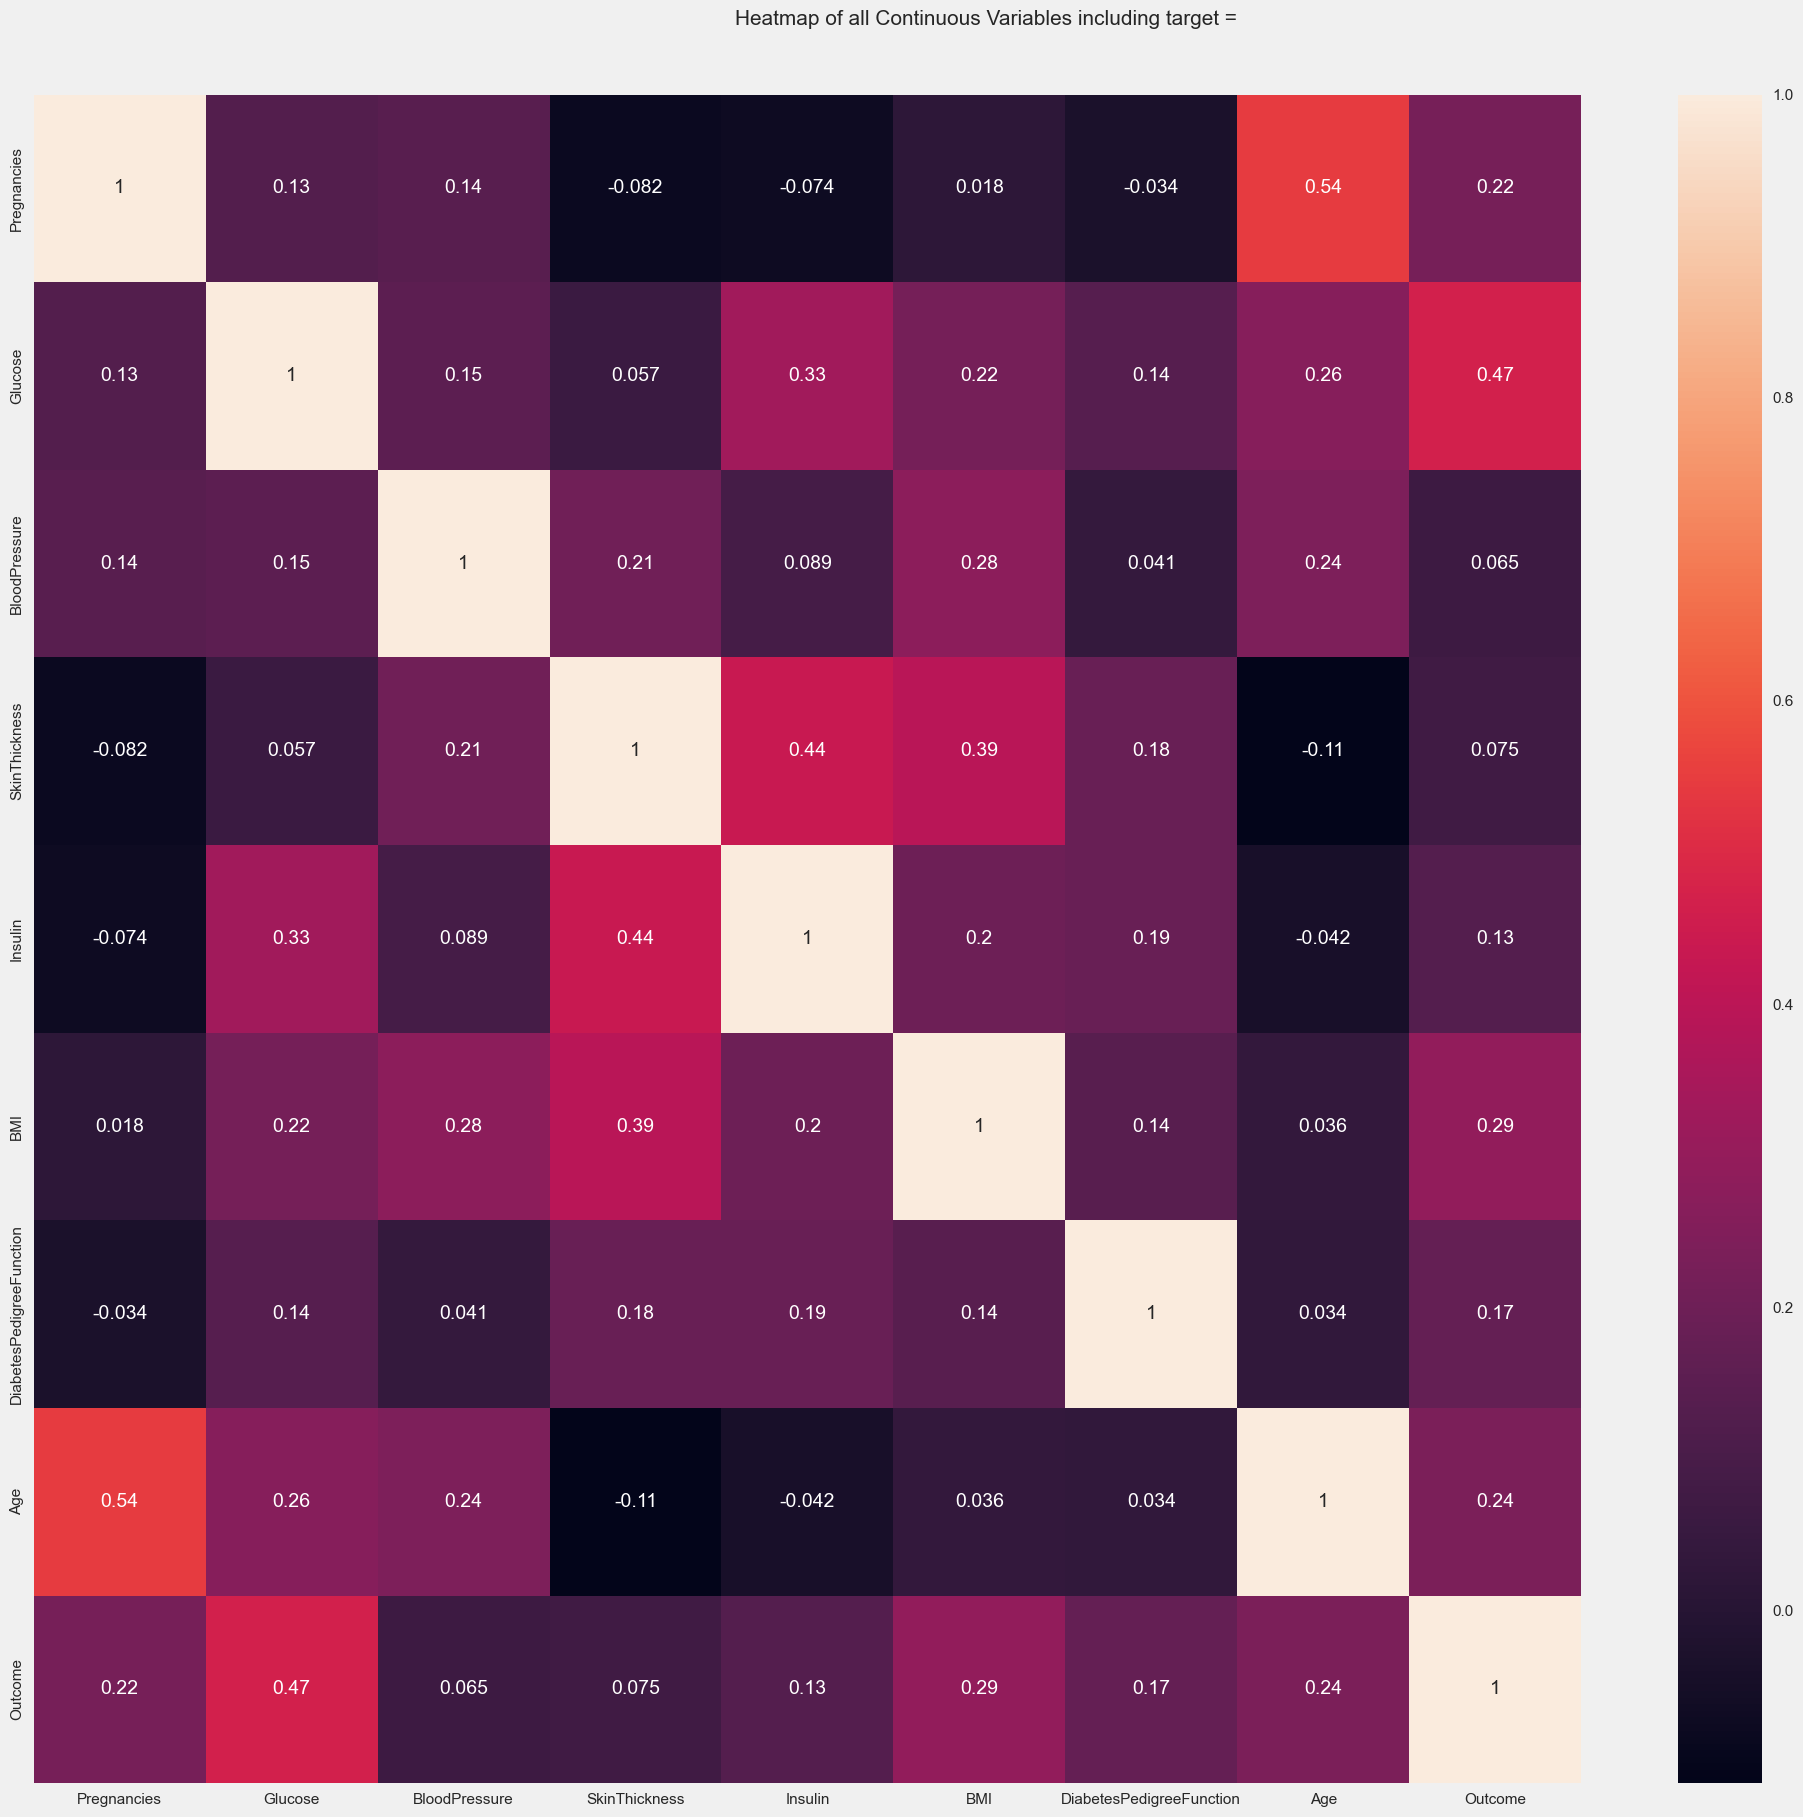

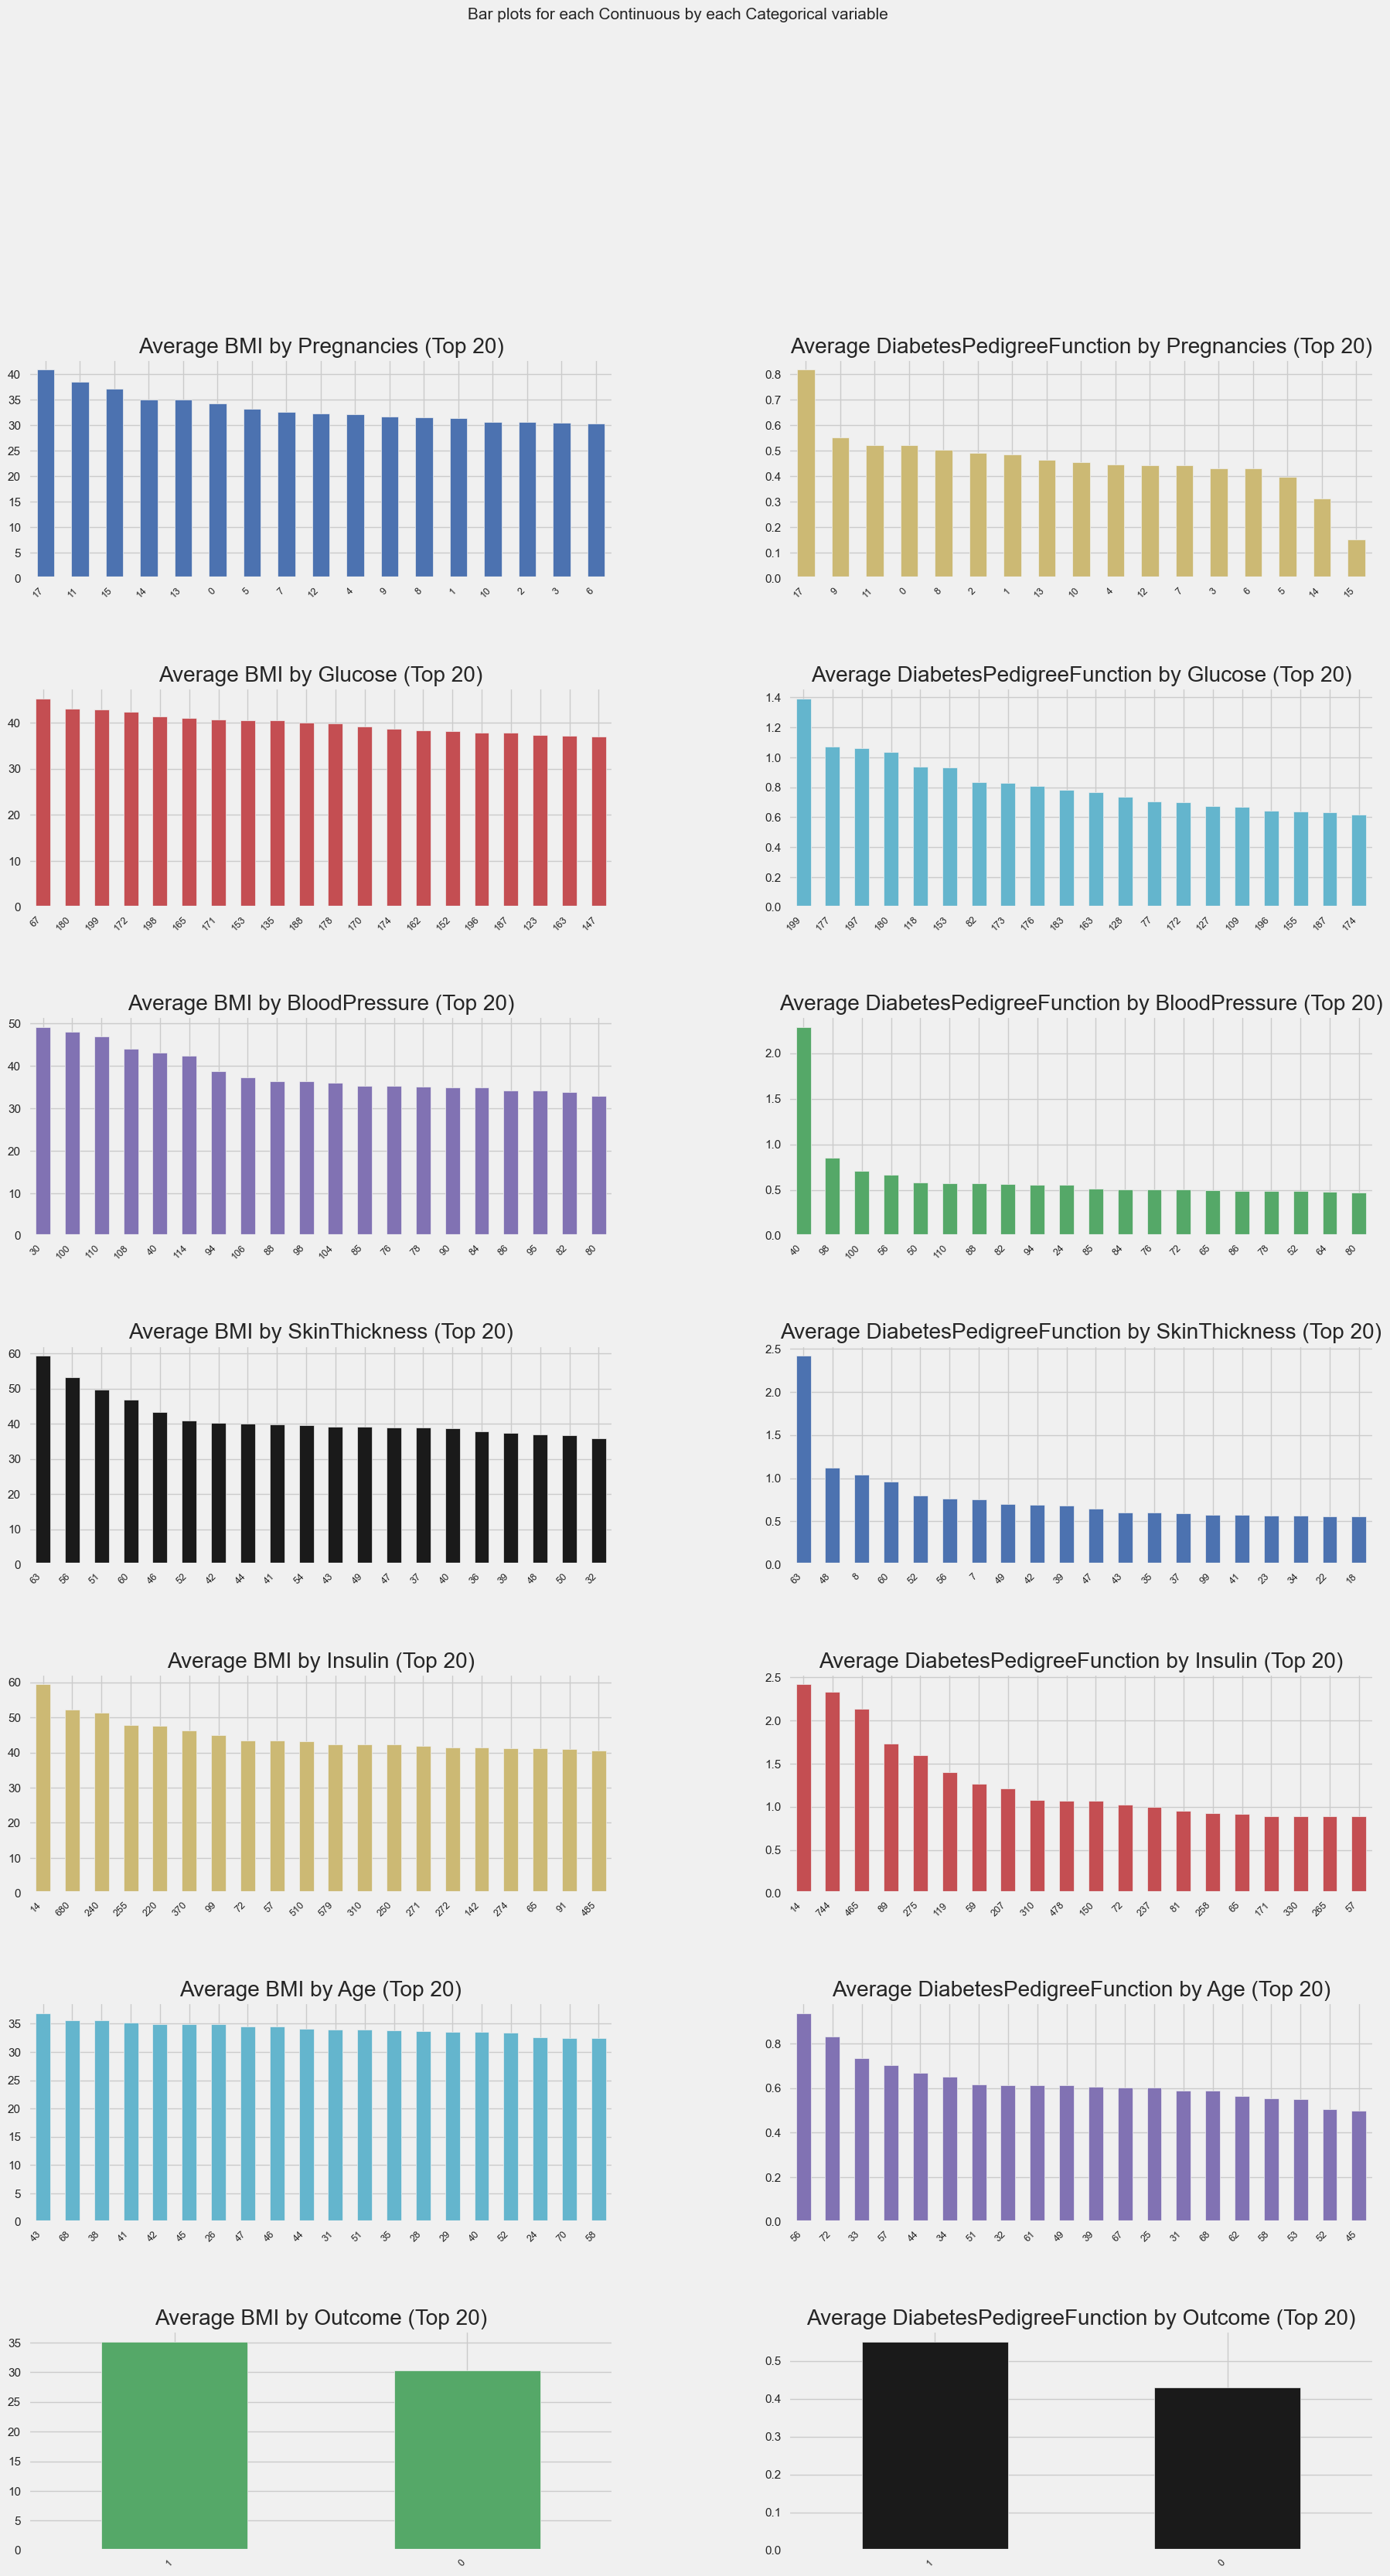

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [190]:
# Generate visualizations
df = AV.AutoViz('diabetes.csv')

In [191]:
#Learning which feature needs cleaning
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
DiabetesPedigreeFunction,517,float64,0,0.000000,67.317708,0,skewed: cap or drop outliers
BMI,248,float64,0,0.000000,32.291667,0,
Insulin,186,int64,0,0.000000,24.218750,0,
Glucose,136,int64,0,0.000000,17.708333,0,
Age,52,int64,0,0.000000,6.770833,0,
SkinThickness,51,int64,0,0.000000,6.640625,0,
BloodPressure,47,int64,0,0.000000,6.119792,0,
Pregnancies,17,int64,0,0.000000,2.213542,0,
Outcome,2,int64,0,0.000000,0.260417,0,


In [192]:
#Remove the suggested outliers
lower = df["DiabetesPedigreeFunction"].quantile(0.05)
upper = df["DiabetesPedigreeFunction"].quantile(0.95)
df = df[(df["DiabetesPedigreeFunction"] > lower) & (df["DiabetesPedigreeFunction"] < upper)];

In [193]:
lower, upper

(0.14035, 1.1328499999999997)

In [194]:
df.shape

(690, 9)

In [195]:
#Load LazyPredict library
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

In [196]:
#Define the preditors X and predictive y (classification)
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [197]:
X.shape, y.shape

((690, 8), (690,))

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 13)

In [199]:
clf = LazyClassifier(verbose = 0, 
                    ignore_warnings = False, 
                    custom_metric =None)

In [200]:
train, test = clf.fit(X_train, X_test, y_train, y_test)

 31%|█████████████████████████▊                                                         | 9/29 [00:00<00:01, 19.36it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.96it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


In [201]:
#Print the model performance
train.sort_values("Accuracy", axis = 0, ascending = False,
                 inplace = True)
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.78,0.75,0.75,0.77,0.03
LogisticRegression,0.78,0.75,0.75,0.77,0.02
LinearDiscriminantAnalysis,0.78,0.75,0.75,0.77,0.01
KNeighborsClassifier,0.78,0.75,0.75,0.77,0.02
QuadraticDiscriminantAnalysis,0.77,0.75,0.75,0.77,0.02
LinearSVC,0.77,0.74,0.74,0.77,0.04
RidgeClassifier,0.77,0.74,0.74,0.77,0.02
CalibratedClassifierCV,0.77,0.74,0.74,0.77,0.11
RandomForestClassifier,0.77,0.74,0.74,0.77,0.21


In [210]:
train["Accuracy"] = [0 if i<0 else i for i in train.iloc[:,0]]

[(0.0, 1.0)]

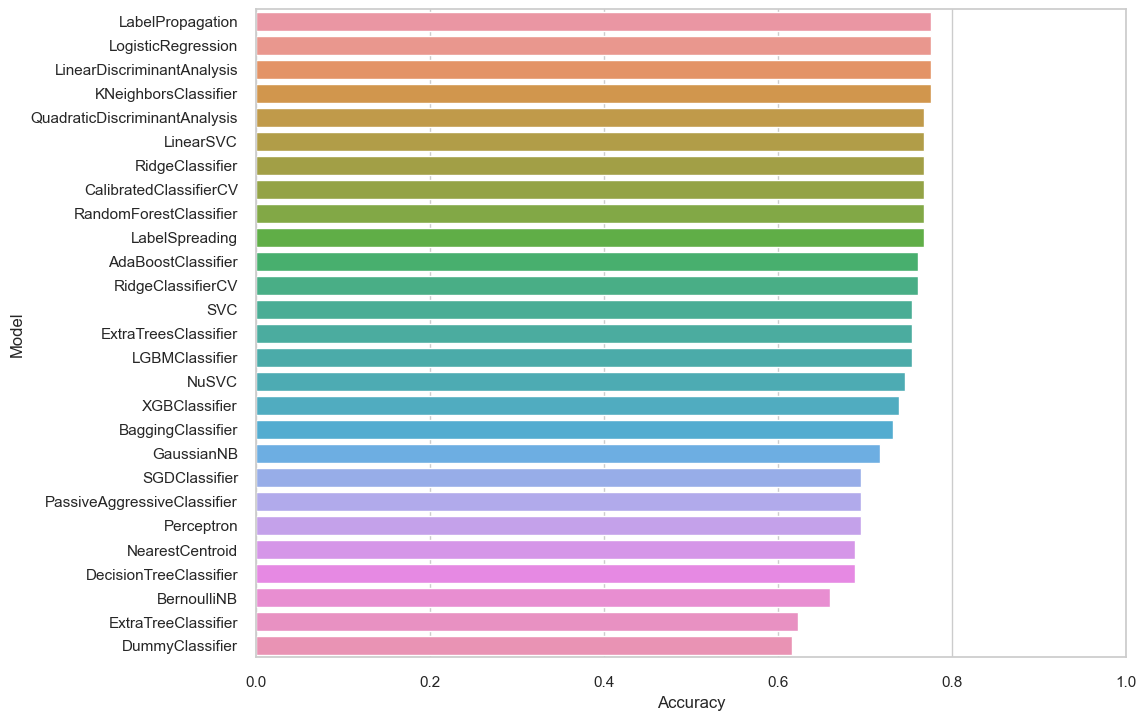

In [211]:
plt.figure(figsize = (10,8))
sns.set_theme (style ='whitegrid')
ax = sns.barplot(y=train.index, x='Accuracy', data = train)
ax.set(xlim=(0,1))